# 작업형2 공개문제
-----------------------

## 주의사항

#### 출력을 원하실 경우 **print()** 활용, 그래프 확인 불가능
#### 예) print(df.head())

#### 답안 제출 예시
#### 수험번호.csv 생성 data.to_csv("0000.csv", index=False)

 아래는 백화점 고객의 1년 간 구매 데이터이다.
 
 
 ____________________
 제공 데이터 목록
 y_train : 고객의 성별 데이터 (학습)
 X_train, X_test : 고객의 상품구매 속성
 

 데이터 형식 및 내용
 y_train(3,500x2) cust_id, gender
 
 X_train(3,500)
 X_test(2,482)
 
 ____________________
 고객 3,500명에 대한 학습용 데이터를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 CSV 파일로 생성하시오.
 
 
 

## 모듈 불러오기

In [36]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [37]:
X_train = pd.read_csv('data/X_train.csv',engine = 'python',index_col=0) #col 이름이 한국어 => 깨짐 방지를 위해 engine = 'python'
X_test = pd.read_csv('data/X_test.csv',engine = 'python',index_col=0) #col 이름이 한국어 => 깨짐 방지를 위해 engine = 'python'
y_train = pd.read_csv('data/y_train.csv',engine = 'python',index_col=0) #col 이름이 한국어 => 깨짐 방지를 위해 engine = 'python'

# 구름에서는 따로 engine 필요 없는듯
# index_col을 사용해서 index 지정은 가능


In [38]:
print(X_train.head())

             총구매액     최대구매액       환불금액   주구매상품 주구매지점  내점일수   내점당구매건수  \
cust_id                                                                
0        68282840  11264000  6860000.0      기타   강남점    19  3.894737   
1         2136000   2136000   300000.0     스포츠   잠실점     2  1.500000   
2         3197000   1639000        NaN  남성 캐주얼   관악점     2  2.000000   
3        16077620   4935000        NaN      기타   광주점    18  2.444444   
4        29050000  24000000        NaN      보석  본  점     2  1.500000   

           주말방문비율  구매주기  
cust_id                  
0        0.527027    17  
1        0.000000     1  
2        0.000000     1  
3        0.318182    16  
4        0.000000    85  


In [39]:
print(X_test)

              총구매액     최대구매액        환불금액   주구매상품 주구매지점  내점일수    내점당구매건수  \
cust_id                                                                   
3500      70900400  22000000   4050000.0      골프  부산본점    13   1.461538   
3501     310533100  38558000  48034700.0     농산물   잠실점    90   2.433333   
3502     305264140  14825000  30521000.0    가공식품  본  점   101  14.623762   
3503       7594080   5225000         NaN    주방용품  부산본점     5   2.000000   
3504       1795790   1411200         NaN     수산품  청량리점     3   2.666667   
...            ...       ...         ...     ...   ...   ...        ...   
5977      82581500  23976000         NaN      골프  부산본점     8   1.750000   
5978        480000    480000         NaN    섬유잡화   광주점     1   1.000000   
5979     260003790  25750000         NaN  남성 캐주얼  본  점    19   3.736842   
5980      88991520  18120000         NaN      육류  본  점     5   3.600000   
5981        623700    209000         NaN    가공식품  영등포점     2   5.000000   

           주말방문비율  구매주기 

In [40]:
print(y_train)

         gender
cust_id        
0             0
1             0
2             1
3             1
4             0
...         ...
3495          1
3496          1
3497          0
3498          0
3499          0

[3500 rows x 1 columns]


## 데이터 분포, 이상치, 결측치 확인

In [41]:
print(X_train.describe()) # 중간에 짤리는 현상 발생

               총구매액         최대구매액          환불금액         내점일수      내점당구매건수  \
count  3.500000e+03  3.500000e+03  1.205000e+03  3500.000000  3500.000000   
mean   9.191925e+07  1.966424e+07  2.407822e+07    19.253714     2.834963   
std    1.635065e+08  3.199235e+07  4.746453e+07    27.174942     1.912368   
min   -5.242152e+07 -2.992000e+06  5.600000e+03     1.000000     1.000000   
25%    4.747050e+06  2.875000e+06  2.259000e+06     2.000000     1.666667   
50%    2.822270e+07  9.837000e+06  7.392000e+06     8.000000     2.333333   
75%    1.065079e+08  2.296250e+07  2.412000e+07    25.000000     3.375000   
max    2.323180e+09  7.066290e+08  5.637530e+08   285.000000    22.083333   

            주말방문비율         구매주기  
count  3500.000000  3500.000000  
mean      0.307246    20.958286  
std       0.289752    24.748682  
min       0.000000     0.000000  
25%       0.027291     4.000000  
50%       0.256410    13.000000  
75%       0.448980    28.000000  
max       1.000000   166.000000  


In [42]:
print(X_train.isnull().sum()) # X_train 결측값 환불금액에만 있음 3,500 중 2,295개 결측

총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64


In [43]:
X_test.isnull().sum() # X_test 결측값 환불금액에만 있음 2,482 중 1,611개 결측

총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [44]:
union_data = pd.concat([X_train,y_train],axis = 1)

In [45]:
union_data.corr()

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
총구매액,1.000000,0.700080,0.419734,0.659084,0.090022,0.014396,-0.212944,-0.150141
최대구매액,0.700080,1.000000,0.410562,0.374147,0.018980,0.022277,-0.115837,-0.114323
환불금액,0.419734,0.410562,1.000000,0.270290,-0.063114,-0.062397,-0.211125,-0.078025
내점일수,0.659084,0.374147,0.270290,1.000000,0.225264,-0.010325,-0.293200,-0.155000
내점당구매건수,0.090022,0.018980,-0.063114,0.225264,1.000000,0.007659,-0.091151,-0.043917
주말방문비율,0.014396,0.022277,-0.062397,-0.010325,0.007659,1.000000,0.003372,0.073598
구매주기,-0.212944,-0.115837,-0.211125,-0.293200,-0.091151,0.003372,1.000000,0.041450
gender,-0.150141,-0.114323,-0.078025,-0.155000,-0.043917,0.073598,0.041450,1.000000


### 분포 시각화

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [47]:
X_train.columns

Index(['총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수', '주말방문비율',
       '구매주기'],
      dtype='object')

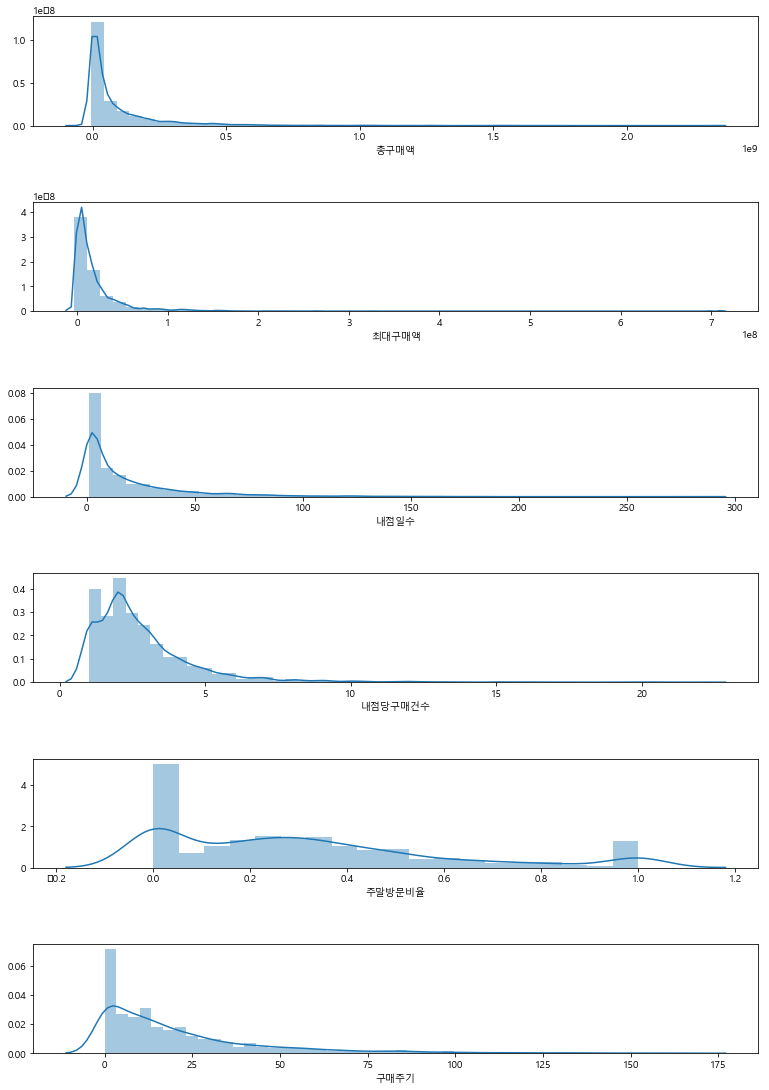

In [48]:
plt.figure(figsize=(13, 18))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.7)
count = 1
for name in (X_train.columns):
    if name == '환불금액':
        pass
    elif (name == '주구매상품') or (name == '주구매지점'):
        pass
        #plt.subplot(6,1,(count+1))
        #sns.countplot(x=name, data=X_train)
    else:
        plt.subplot(6,1,count)
        sns.distplot(X_train[name])
        count = count + 1
        
#sns.distplot(X_train, kde=True, rug=True)

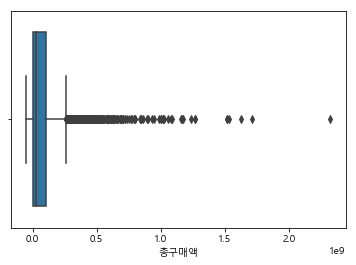

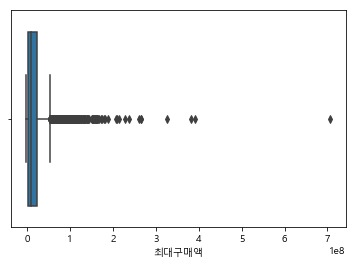

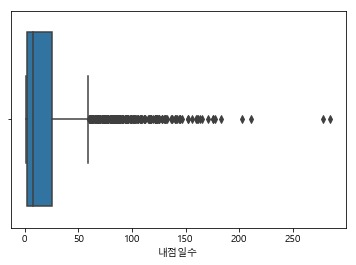

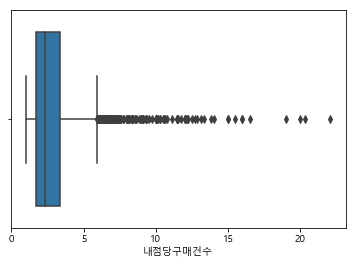

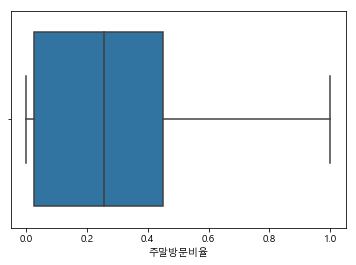

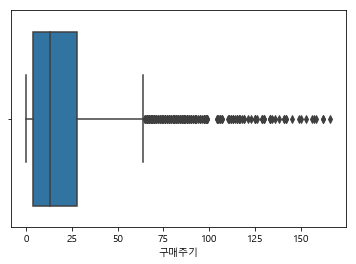

In [49]:
nume_col = ['총구매액','최대구매액','내점일수','내점당구매건수','주말방문비율','구매주기']


for count,i in enumerate(nume_col):
    sns.boxplot(X_train[i])
    plt.show()

### 환불금액과 성별 사이 관계 

상관계수는 -0.078로 상관 관계가 거의 없다고 할 수 있다. 

In [50]:
import matplotlib.pyplot as plt

In [51]:
print('남자-환불금액 Nan',union_data[union_data['gender'] == 1]['환불금액'].isnull().sum())
print('여자-환불금액 Nan',union_data[union_data['gender'] == 0]['환불금액'].isnull().sum())

남자-환불금액 Nan 1026
여자-환불금액 Nan 1269


### 주구매상품, 지점 col

In [52]:
union_data['주구매지점'].astype("category")

cust_id
0        강남점
1        잠실점
2        관악점
3        광주점
4       본  점
        ... 
3495    본  점
3496    부산본점
3497     창원점
3498    본  점
3499    본  점
Name: 주구매지점, Length: 3500, dtype: category
Categories (24, object): ['강남점', '관악점', '광주점', '노원점', ..., '전주점', '창원점', '청량리점', '포항점']

In [53]:
OneHot_지점 = pd.get_dummies(X_train['주구매지점'])

In [54]:
OneHot_상품 = pd.get_dummies(X_train['주구매상품'])

In [55]:
pd.concat([OneHot_지점,OneHot_상품],axis = 1)

,강남점,관악점,광주점,노원점,대구점,대전점,동래점,미아점,본 점,부산본점,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
cust_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
check_col = ['주구매상품','주구매지점']
pd.get_dummies(X_train[check_col])['주구매지점_강남점']

cust_id
0       1
1       0
2       0
3       0
4       0
       ..
3495    0
3496    0
3497    0
3498    0
3499    0
Name: 주구매지점_강남점, Length: 3500, dtype: uint8

In [57]:
union_train = pd.concat([X_train,OneHot_지점,OneHot_상품],axis = 1)

In [58]:
union_train = union_train.drop(['주구매상품','주구매지점'],axis = 1)

In [59]:
union_train #숫자 데이터로 변환

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,강남점,관악점,광주점,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
cust_id,,,,,,,,,,,,,,,,,,,,,
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3197000,1639000,NaN,2,2.000000,0.000000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16077620,4935000,NaN,18,2.444444,0.318182,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,29050000,24000000,NaN,2,1.500000,0.000000,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,1,2.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,29628600,7200000,6049600.0,8,1.625000,0.461538,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,75000,75000,NaN,1,1.000000,0.000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [60]:
union_train = union_train.drop('환불금액',axis = 1)

### 변수 Scale

In [61]:
log_list = ['총구매액', '최대구매액', '내점일수', '내점당구매건수','구매주기']

from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit_transform(union_train))
#train_data_robustScaled = robustScaler.transform(train_data)

[[ 0.39366936  0.0710392   0.47826087 ...  0.          0.
   0.        ]
 [-0.25635293 -0.38337274 -0.26086957 ...  0.          0.
   0.        ]
 [-0.24592653 -0.4081145  -0.26086957 ...  0.          0.
   0.        ]
 ...
 [-0.2766063  -0.48597386 -0.30434783 ...  0.          0.
   0.        ]
 [-0.25891777 -0.43992533 -0.26086957 ...  0.          0.
   1.        ]
 [ 2.30814484  1.23434972  1.30434783 ...  0.          0.
   0.        ]]


In [62]:
x_train = union_data[log_list]
robustScaler = RobustScaler()
#print(pd.DataFrame(robustScaler.fit_transform(x_train)))
union_train[log_list] = robustScaler.fit_transform(x_train)

In [63]:
union_train = union_train.drop('소형가전',axis = 1)

### 모델 적용 Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [27]:
train_X,valid_X,train_y, valid_y = train_test_split(union_train, y_train, test_size=0.4, random_state=25, shuffle = True)

In [28]:
model = LogisticRegression(C = 100.0)
model.fit(train_X, train_y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100.0)

In [29]:
print(model.score(train_X, train_y))

0.68


In [30]:
print(model.score(valid_X, valid_y))
pred_y = model.predict(valid_X)

0.6385714285714286


In [31]:
print("accuracy: %.2f" %accuracy_score(valid_y, pred_y))
print("Precision : %.3f" % precision_score(valid_y, pred_y))
print("Recall : %.3f" % recall_score(valid_y, pred_y))
print("F1 : %.3f" % f1_score(valid_y, pred_y))

accuracy: 0.64
Precision : 0.526
Recall : 0.314
F1 : 0.393


### 모델 적용 SVM

In [35]:
from sklearn import svm

In [33]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1,1.0,10.0,100.0]
for i in kernel:
    for j in C:
        
        clf = svm.SVC(kernel=i,C=j)
        clf.fit(train_X, train_y)
        print(clf.score(train_X,train_y))
        pred_y = clf.predict(valid_X)
        
        print(i,j)
        print("accuracy: %.2f" %accuracy_score(valid_y, pred_y))
        print("Precision : %.3f" % precision_score(valid_y, pred_y))
        print("Recall : %.3f" % recall_score(valid_y, pred_y))
        print("F1 : %.3f" % f1_score(valid_y, pred_y))
    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6428571428571429
linear 0.1
accuracy: 0.64
Precision : 0.580
Recall : 0.090
F1 : 0.156


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6619047619047619
linear 1.0
accuracy: 0.63
Precision : 0.507
Recall : 0.272
F1 : 0.354


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6619047619047619
linear 10.0
accuracy: 0.63
Precision : 0.507
Recall : 0.272
F1 : 0.354


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6619047619047619
linear 100.0
accuracy: 0.63
Precision : 0.507
Recall : 0.272
F1 : 0.354


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6295238095238095
poly 0.1
accuracy: 0.63
Precision : 0.429
Recall : 0.011
F1 : 0.022


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.650952380952381
poly 1.0
accuracy: 0.62
Precision : 0.390
Recall : 0.031
F1 : 0.057


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7519047619047619
poly 10.0
accuracy: 0.62
Precision : 0.474
Recall : 0.193
F1 : 0.275


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8766666666666667
poly 100.0
accuracy: 0.57
Precision : 0.414
Recall : 0.345
F1 : 0.376


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.621904761904762
rbf 0.1
accuracy: 0.63
Precision : 0.000
Recall : 0.000
F1 : 0.000


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7133333333333334
rbf 1.0
accuracy: 0.64
Precision : 0.542
Recall : 0.299
F1 : 0.385


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8147619047619048
rbf 10.0
accuracy: 0.64
Precision : 0.516
Recall : 0.375
F1 : 0.435


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9052380952380953
rbf 100.0
accuracy: 0.57
Precision : 0.418
Recall : 0.362
F1 : 0.388


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5904761904761905
sigmoid 0.1
accuracy: 0.59
Precision : 0.458
Recall : 0.506
F1 : 0.480


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5914285714285714
sigmoid 1.0
accuracy: 0.59
Precision : 0.453
Recall : 0.450
F1 : 0.451


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5923809523809523
sigmoid 10.0
accuracy: 0.59
Precision : 0.452
Recall : 0.448
F1 : 0.450


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5919047619047619
sigmoid 100.0
accuracy: 0.59
Precision : 0.454
Recall : 0.452
F1 : 0.453


### 결과 추출

In [34]:
X_test

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8
...,...,...,...,...,...,...,...,...,...
5977,82581500,23976000,NaN,골프,부산본점,8,1.750000,0.642857,40
5978,480000,480000,NaN,섬유잡화,광주점,1,1.000000,0.000000,0
5979,260003790,25750000,NaN,남성 캐주얼,본 점,19,3.736842,0.915493,18


In [65]:
x_test = X_test[log_list]
X_test[log_list] = robustScaler.fit_transform(x_test)

OneHot_지점 = pd.get_dummies(X_test['주구매지점'])
OneHot_상품 = pd.get_dummies(X_test['주구매상품'])

Test = pd.concat([X_test,OneHot_지점,OneHot_상품],axis = 1)
Test = Test.drop(['주구매지점','주구매상품','환불금액'],axis = 1)

In [66]:
Test

,총구매액,최대구매액,내점일수,내점당구매건수,주말방문비율,구매주기,강남점,관악점,광주점,노원점,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
cust_id,,,,,,,,,,,,,,,,,,,,,
3500,0.332789,0.480813,0.161616,-0.596562,0.789474,0.565217,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3501,2.307536,1.188643,3.272727,0.001465,0.369863,-0.434783,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3502,2.264116,0.174093,3.717172,7.503268,0.083277,-0.434783,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3503,-0.188900,-0.236292,-0.161616,-0.265201,0.000000,1.478261,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3504,-0.236682,-0.399326,-0.242424,0.145055,0.125000,-0.217391,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,0.429050,0.565284,-0.040404,-0.419048,0.642857,1.173913,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5978,-0.247525,-0.439134,-0.323232,-0.880586,0.000000,-0.565217,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5979,1.891138,0.641120,0.404040,0.803624,0.915493,0.217391,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
clf = svm.SVC(kernel='rbf',C=10.0,probability=True)
clf.fit(union_train, y_train)
print(clf.score(union_train, y_train))
pred_y = clf.predict_proba(Test)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7668571428571429


In [76]:
result = pd.DataFrame(pred_y,index=x_test.index)
result = result.drop(0,axis=1)
result.rename(columns={1:'gender'},inplace=True)

In [80]:
result.index.name = 'custid'

In [81]:
result

,gender
custid,
3500,0.458584
3501,0.233906
3502,0.647137
3503,0.251640
3504,0.333536
...,...
5977,0.427414
5978,0.598940
5979,0.458516


In [82]:
result.to_csv('수험번호.csv')